# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Faris Kurniawan
- **Email:** farisfurqon2881@gmail.com
- **ID Dicoding:** awan_rmn

## Menentukan Pertanyaan Bisnis

*   Pada musim apa yang paling sering menerima pesanan rental?
*   Bagaimana kondisi rental sepeda pada tahun 2011 dan 2012

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Baca file day.csv

In [3]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Baca File hour.csv

In [4]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Cek Informasi yang ada di day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak adanya misssing value dalam tabel ini. Untuk memastikannya bisa lakukan program ini. Tetapi untuk kolom dteday, harus diubah bentuk tipe datanya.

In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Lakukan Pengecekan Duplikasi Data

In [7]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


Karena tidak ada duplikasi data, bisa gunakan keyword describe untuk mengetahui informasi statistika dalam day_df

In [8]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Selanjutnya lakukan hal yang sama untuk hour_df

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tidak adanya missing value, bisa dipastikan lagi dengan program ini. Tetapi untuk kolom dteday, harus diubah bentuk tipe datanya menjadi datetime.

In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Selanjutnya, bisa lakukan pengecekan untuk duplikasi data

In [11]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


Karena tidak ada duplikasi data, bisa gunakan keyword describe untuk mengetahui informasi statistika dalam day_df

In [12]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Cleaning Data

cleaning data untuk tabel day_df. Kode ini hanya berlaku apabila ingin mengganti tipe data datetime terhadap 1 kolom saja.

In [13]:
datetime_columns = ["dteday"]
day_df[datetime_columns] = day_df[datetime_columns].apply(pd.to_datetime, format="%Y-%m-%d")
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Selanjutnya, lakukan hal yang sama terhadap hour_df

In [14]:
datetime_columns = ["dteday"]
hour_df[datetime_columns] = hour_df[datetime_columns].apply(pd.to_datetime, format="%Y-%m-%d")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

Sebagai permulaaan buat describe mengenai day_df dan hour_df

In [15]:
day_df.describe(include ="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [16]:
hour_df.describe(include ="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Buat pivot table pada day_df untuk menentukan berapa banyak orang yang menggunakan rental sepeda berdasarkan bulan dan tahun

In [17]:
day_df.groupby(by=["yr", "mnth"]).agg({
    "casual" : "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered     cnt
yr mnth                            
0  1       3073       35116   38189
   2       6242       41973   48215
   3      12826       51219   64045
   4      22346       72524   94870
   5      31050      104771  135821
   6      30612      112900  143512
   7      36452      104889  141341
   8      28842      107849  136691
   9      26545      100873  127418
   10     25222       98289  123511
   11     15594       86573  102167
   12      8448       78875   87323
1  1       8969       87775   96744
   2       8721       94416  103137
   3      31618      133257  164875
   4      38456      135768  174224
   5      44235      151630  195865
   6      43294      159536  202830
   7      41705      161902  203607
   8      43197      171306  214503
   9      43778      174795  218573
   10     34538      164303  198841
   11     21009      131655  152664
   12     13245      110468  123713

Selanjutnya kita buat pivot table pada day_df untuk mengetahui musim apa yang paling banyak menerima pesanan rental sepeda

In [18]:
day_df.groupby(by=["season"]).agg({
    "casual" : "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
season,,,
3,226091,835038,1061129
2,203522,715067,918589
4,129782,711831,841613
1,60622,410726,471348


Berdasarkan data tersebut, kita bisa mengetahui bahwa musim gugur merupakan musim yang paling banyak menerima pesanan rental sepeda.

Selanjutnya buat pivot table untuk hour_df. Menentukan jam berapa yang paling sering mendapatkan pesanan rental sepeda

In [19]:
hour_df.groupby(by=["hr"]).agg({
    "casual" : "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


Berdasarkan pivot tabel tersebut, bisa dilihat bahwa penggunaan rental sepeda paling banyak dilakukan pada jam 17.

 Selanjutnya kita perlu buat pivot table untuk melihat pesanan pada cuaca, temperatur, dan kelembapan

In [20]:
day_df.groupby(by=["weathersit"]).agg({
    "casual" : "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


In [21]:
day_df.groupby(by=["temp"]).agg({
    "casual" : "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
temp,,,
0.564167,5640,20799,26439
0.635000,4698,21314,26012
0.649167,4116,20100,24216
0.514167,4936,18027,22963
0.710833,5978,16828,22806
...,...,...,...
0.216667,9,674,683
0.389091,46,577,623
0.376522,114,491,605


In [22]:
day_df.groupby(by=["hum"]).agg({
    "casual" : "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
hum,,,
0.613333,5735,18388,24123
0.570000,3676,16767,20443
0.630833,2590,17700,20290
0.552083,2576,17188,19764
0.690000,2704,16075,18779
...,...,...,...
0.882500,57,570,627
0.000000,46,577,623
0.948261,114,491,605


Terakhir, kita perlu membuat pivot table untuk melihat tanggal mana yang memiliki pesanan paling banyak

In [23]:
hour_df.groupby(by=["dteday"]).agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,cnt
dteday,
2012-09-15,8714
2012-09-29,8555
2012-09-22,8395
2012-03-23,8362
2012-05-19,8294
...,...
2011-03-06,605
2011-01-26,506
2012-12-26,441


Menggabungkan 2 tabel, yakni tabel hour_df dan day_df

In [24]:
hour_day_df = pd.merge(
    left = hour_df,
    right = day_df,
    how = "left",
    left_on = ["instant", "dteday", "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"],
    right_on = ["instant", "dteday", "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"],
    )
hour_day_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Buat pivot table untuk menentukan berapa kecepatan angin yang pas digunakan untuk menggunakan sepeda

In [25]:
hour_day_df.groupby(by=["windspeed"]).agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,cnt
windspeed,
0.0000,350203
0.1642,332998
0.1940,332407
0.2239,320678
0.1343,306423
0.2537,276880
0.1045,268821
0.2836,225882
0.0896,213804


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada Musim apa yang paling sering menerima pesanan rental

<ipython-input-29-5acce3c5782c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


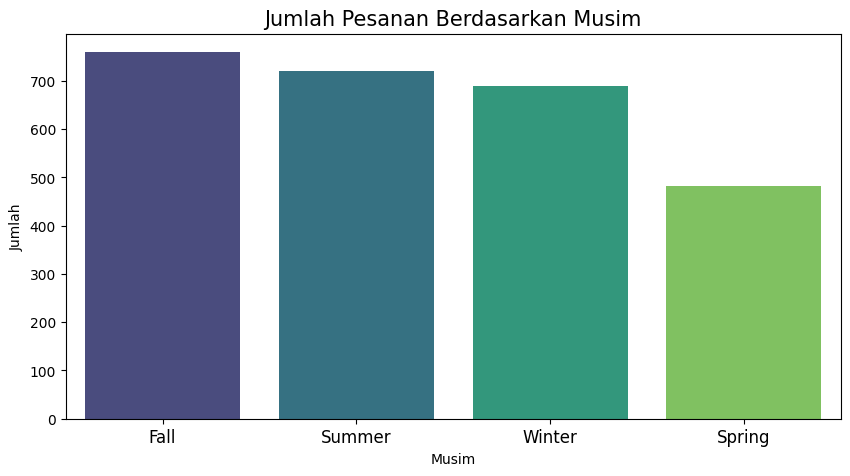

In [29]:
season_df = hour_day_df.groupby(by="season").cnt.nunique().reset_index()
season_df.rename(columns={
    "cnt": "both_count"
}, inplace=True)

season_df["season"] = season_df["season"].replace({
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})
plt.figure(figsize=(10, 5))

sns.barplot(
    y="both_count",
    x="season",
    data=season_df.sort_values(by="both_count", ascending=False),
    palette="viridis"
)
plt.title("Jumlah Pesanan Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel("Jumlah")
plt.xlabel("Musim")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Bagaimana kondisi rental sepeda pada tahun 2011 dan 2012

Tahun 2011

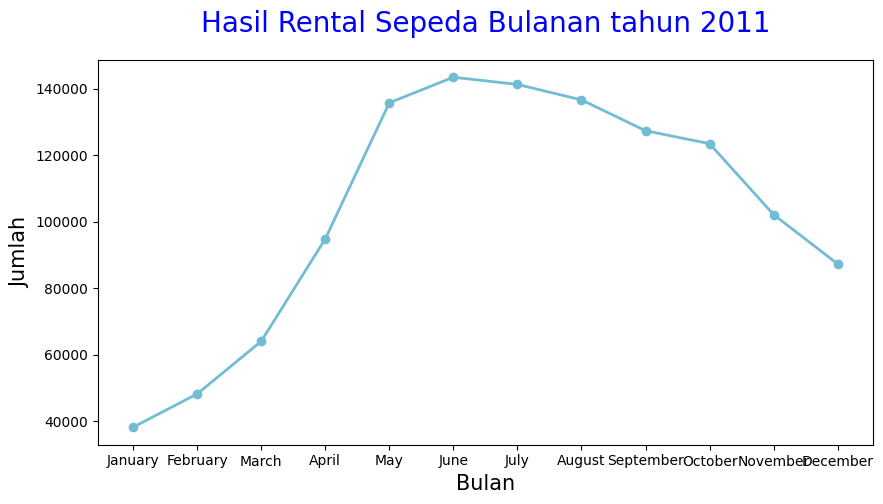

In [30]:
hour_day_df_2011 = hour_day_df[hour_day_df['dteday'].dt.year == 2011]

monthly_rental_df = hour_day_df_2011.resample(rule='M', on='dteday').agg({
    "casual" : "sum",
    "registered": "sum",
    "cnt" : "sum"
})
monthly_rental_df.index = monthly_rental_df.index.strftime('%B')
monthly_rental_df = monthly_rental_df.reset_index()
monthly_rental_df.rename(columns={
    "cnt": "both_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_rental_df["dteday"], monthly_rental_df["both_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Hasil Rental Sepeda Bulanan tahun 2011", loc="center", pad=20, fontsize=20, color="blue")
plt.xlabel("Bulan", fontsize=15)
plt.ylabel("Jumlah", fontsize=15)
plt.show()

Tahun 2012

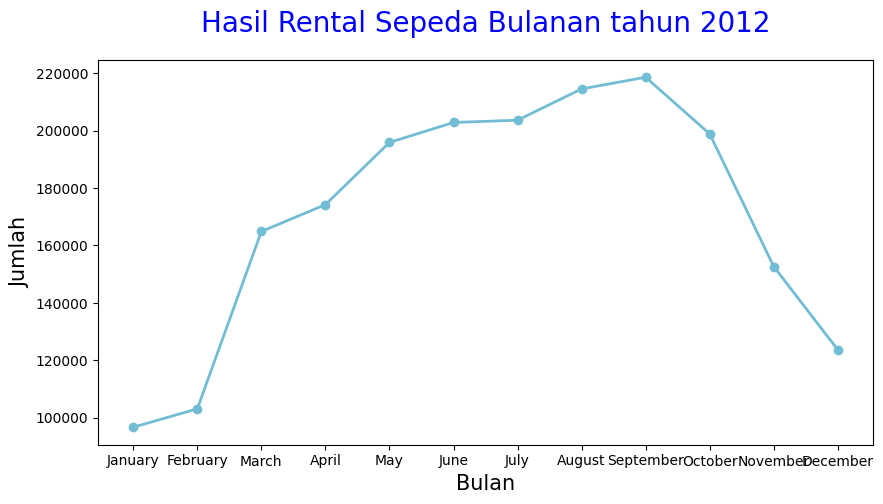

In [42]:
hour_day_df_2012 = hour_day_df[hour_day_df['dteday'].dt.year == 2012]

monthly_rental_df = hour_day_df_2012.resample(rule='M', on='dteday').agg({
    "casual" : "sum",
    "registered": "sum",
    "cnt" : "sum"
})
monthly_rental_df.index = monthly_rental_df.index.strftime('%B')
monthly_rental_df = monthly_rental_df.reset_index()
monthly_rental_df.rename(columns={
    "cnt": "both_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_rental_df["dteday"], monthly_rental_df["both_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Hasil Rental Sepeda Bulanan tahun 2012", loc="center", pad=20, fontsize=20, color="blue")
plt.xlabel("Bulan", fontsize=15)
plt.ylabel("Jumlah", fontsize=15)
plt.show()

## Analisis Lanjutan (Opsional)

Analisis jumlah rental sepeda per tahun

<ipython-input-34-5c2aae3346f5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


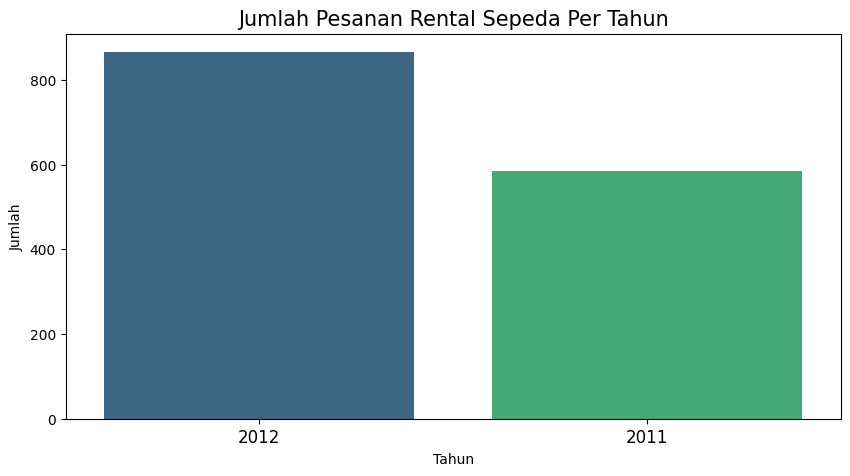

In [34]:
year_df = hour_day_df.groupby(by="yr").cnt.nunique().reset_index()
year_df.rename(columns={
    "cnt": "both_count"
}, inplace=True)

year_df["yr"] = ["2011", "2012"]
plt.figure(figsize=(10, 5))

sns.barplot(
    y="both_count",
    x="yr",
    data=year_df.sort_values(by="both_count", ascending=False),
    palette="viridis"
)
plt.title("Jumlah Pesanan Rental Sepeda Per Tahun", loc="center", fontsize=15)
plt.ylabel("Jumlah")
plt.xlabel("Tahun")
plt.tick_params(axis='x', labelsize=12)
plt.show()

Buat bar-char berdasarkan cuaca

<ipython-input-36-9538c7e97b39>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


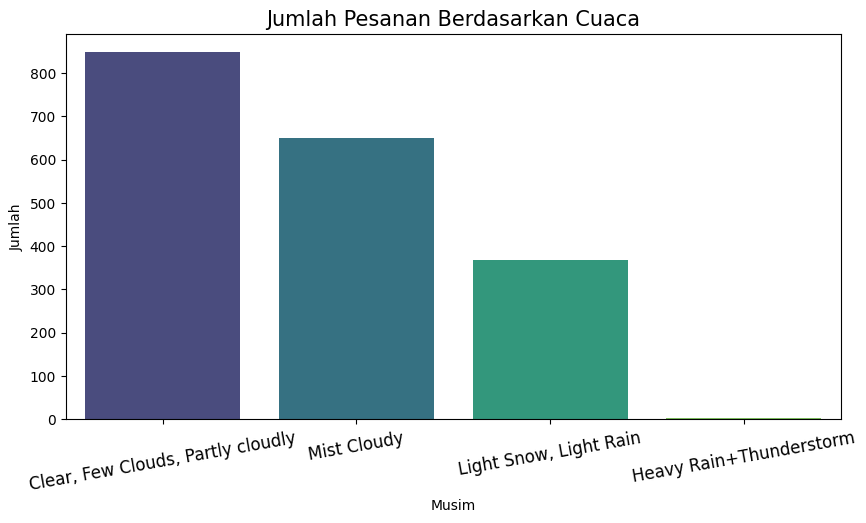

In [36]:
weather_df = hour_day_df.groupby(by="weathersit").cnt.nunique().reset_index()
weather_df.rename(columns={
    "cnt": "both_count"
}, inplace=True)

weather_df["weathersit"] = weather_df["weathersit"].replace({
    1: "Clear, Few Clouds, Partly cloudly",
    2: "Mist Cloudy",
    3: "Light Snow, Light Rain",
    4: "Heavy Rain+Thunderstorm"
})
plt.figure(figsize=(10, 5))

sns.barplot(
    y="both_count",
    x="weathersit",
    data=weather_df.sort_values(by="both_count", ascending=False),
    palette="viridis"
)
plt.title("Jumlah Pesanan Berdasarkan Cuaca", loc="center", fontsize=15)
plt.ylabel("Jumlah")
plt.xlabel("Musim")
plt.xticks(rotation=10)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Conclusion

- Berdasrkan Jawaban yang sudah didapat, musim gugur merupakan musim yang memiliki tingkat penjualan yang paling banyak dibandingkan 3 musim lainnya
- Untuk tahun 2011, penjualan tertinggi terdapat pada bulan Juni dan paling sedikit terdapat pada bulan Januari. Pada tahun 2012, penjualan tertinggi terdapat pada bulan September, dan paling sedikit pada bulan Januari